In [14]:
#--------------------------Data Collection and Preprocessing--------------------------------------#
import pandas as pd   
import numpy as np 

#Load dataset into DataFrame
syringe_df = pd.read_csv('Summary_of_Syringe_Data_in_NYC_Parks_20240306.csv')

#Drop these columns from the Syringe Dataset. Since most of the cells in these columns are empty. 
syringe_df = syringe_df.drop('kiosk_number', axis=1)
syringe_df = syringe_df.drop('kiosk_syringes', axis=1)
syringe_df = syringe_df.drop('kiosk_type', axis=1)
syringe_df = syringe_df.drop('kiosk_site', axis=1)

#I want to stort the data in some way, sorting it in decsending order by year seems like a good idea. 
syringe_df = syringe_df.sort_values(by='collected_date', ascending=False)

#Display the first 5 rows of the specific rows
syringe_df.head()


,response_id,gispropnum,omppropid,collected_date,time_of_day,year,month,month_text,week,group,location,ground_syringes,total_syringes,precinct,borough,district,property_type,created_date,source
3126,X-008424,X001,X001-ZN01,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Parks,Aqueduct Walk,135.0,135.0,52.0,Bronx,X-07,ZONE,2024-01-06 06:17:33.0000000,M&O MS Forms
6639,X-008428,X044,X044,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Parks,St. James Park,78.0,78.0,52.0,Bronx,X-07,PARK,2024-01-06 06:19:43.0000000,M&O MS Forms
11403,X-008325,X283,X283,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,BBP,Beanstalk Playground,5.0,5.0,46.0,Bronx,X-05,PARK,2023-12-31 11:36:37.0000000,M&O MS Forms
9161,X-008323,X085,X085,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,BBP,Slattery Playground,3.0,3.0,46.0,Bronx,X-05,PARK,2023-12-31 11:34:29.0000000,M&O MS Forms
9248,X-008401,X103,X103,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Parks,People's Park,2.0,2.0,40.0,Bronx,X-01,PARK,2024-01-04 10:55:07.0000000,M&O MS Forms


In [2]:
# Assuming 'column_name' is the name of the column you're interested in
unique_instances = syringe_df['borough'].unique()

# Print the result
print("Number of unique instances:", unique_instances)


Number of unique instances: ['Bronx' 'Manhattan' nan 'Queens' 'Brooklyn' 'Staten Island']


In [3]:

# Assuming 'column_name' is the name of the column you're interested in
unique_instances = syringe_df['source'].unique()

# Print the result
print("Number of unique instances:", unique_instances)


Number of unique instances: ['M&O MS Forms' 'Google Forms' 'Intranet Form' 'CP/NYHRE']


In [4]:

# Assuming 'column_name' is the name of the column you're interested in
unique_instances = syringe_df['group'].unique()

# Print the result
print("Number of unique instances:", unique_instances)


Number of unique instances: ['Parks' 'BBP' 'CP/NYHRE']


In [5]:

# Assuming 'column_name' is the name of the column you're interested in
unique_instances = syringe_df['year'].unique()

# Print the result
print("Number of unique instances:", unique_instances)


Number of unique instances: [2023 2022 2021 2020 2019 2018 2017 2024]


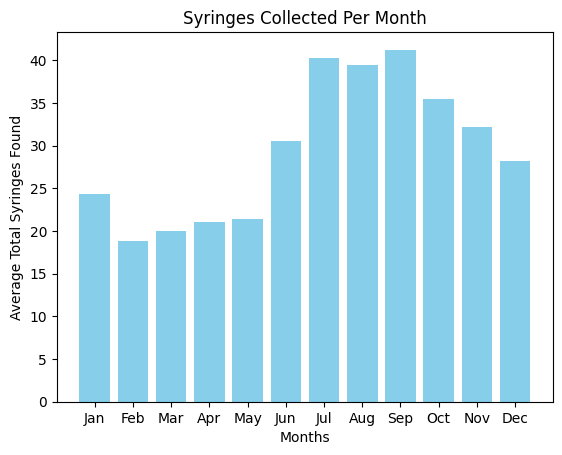

'\nI chose a bar chart to depict the relationship between the amount of syringes found areound New York\nto the months in the year to determine if there was a patern to be seen. From my chart, the relationship\nbetween the syringes found and the months of the year show that there is a significant increase\nin the avergae amount found as soon a it reaches the summer months and that amount slower decreases\nin the winter. \n'

In [6]:
#--------------------------Data Visualization--------------------------------------#
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt

#----------Bar Chart-------

# Create a Figure and Axes object
fig, ax = plt.subplots()

#Sort months so it shows correclty in the bar chart
syringe_df_sortedby_month = syringe_df.sort_values(by='month')

#Multiple cells had duplicates of the same months. had to drop them to correctly display the chart
unique_months_df =syringe_df_sortedby_month[['month', 'month_text']].drop_duplicates()

#Find what is the average amount of syringes that are found each month. 
avg_syringe_per_month = syringe_df.groupby('month')['total_syringes'].mean()
#print (avg_syringe_per_month)

#Set variables
months = unique_months_df['month_text'].values
values = avg_syringe_per_month.values

#Plot the data in a bar chart
ax.bar(months, values, color='skyblue')
ax.set_title('Syringes Collected Per Month')
ax.set_xlabel("Months")
ax.set_ylabel("Average Total Syringes Found")

# Show the plot
plt.show()

#Explain why the selected visualizations are appropriate for your analysis.
'''
I chose a bar chart to depict the relationship between the amount of syringes found around New York
to the months in the year to determine if there was a pattrn to be seen. From my chart, the relationship
between the syringes found and the months of the year show that there is a significant increase
in the average amount found as soon as it reaches the summer months and that amount slower decreases
in the winter. 
'''

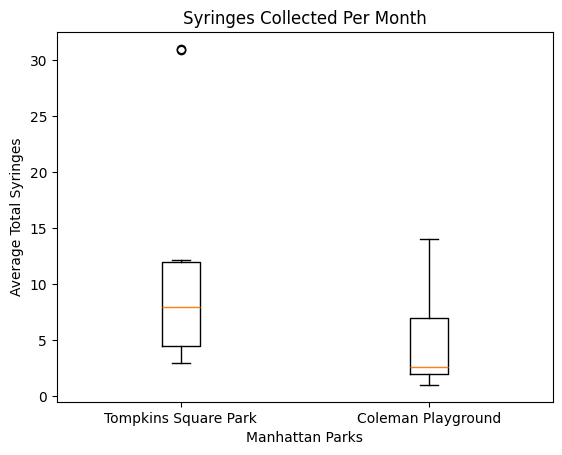

'\nI chose a box plot to showcase w=the median numbers of syringes found in these\ntwo parks in Manhattan. A box plot allowed me to compare the median of syringe\ncollections in different parks. You can easily see which parks tend to have\nhigher or lower median numbers of syringes collected.\n'

In [7]:
#--------------------------Data Visualization--------------------------------------#
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt

#------Box Plot-------

#Find what is the average amount of syringes that are found each month. Reset the index from the way it was before
avg_syringes_per_month_park = syringe_df.groupby(['month', 'location'])['total_syringes'].mean().reset_index()

# Box plot data
tompkinsSquare_park_data = avg_syringes_per_month_park[avg_syringes_per_month_park['location'] == 'Tompkins Square Park']['total_syringes']
coleman_playground_data = avg_syringes_per_month_park[avg_syringes_per_month_park['location'] == 'Coleman Playground']['total_syringes']

# Plot data in box chart
fig, ax = plt.subplots()
ax.set_title('Syringes Collected Per Month')
ax.set_xlabel("Manhattan Parks")
ax.set_ylabel("Average Total Syringes")
ax.boxplot([tompkinsSquare_park_data, coleman_playground_data], 
           labels=['Tompkins Square Park', 'Coleman Playground'])

# Show plot
plt.show()
#Explain why the selected visualizations are appropriate for your analysis.
'''
I chose a box plot to showcase the median numbers of syringes found in these
two parks in Manhattan. A box plot allowed me to compare the median of syringe
collections in different parks. You can easily see which parks tend to have
higher or lower median numbers of syringes collected.
'''


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#Multiple Linear Regression Model with columns 'Source' which held the underlying source of data for this
#entry and the 'year' number to predict the "Group" value which holds the names of the groups responsible for the
#collection of syringes

# Here i will encode categorical variables using one-hot encoding. Changing the values to binary
df_encoded = pd.get_dummies(syringe_df, columns=['source'], drop_first=True)

# Encode the 'group' column as well
label_encoder = LabelEncoder()
df_encoded['group_encoded'] = label_encoder.fit_transform(syringe_df['group'])

# Split the data into x and y variables
X = df_encoded[['year'] + list(df_encoded.filter(regex='source_').columns)]
y = df_encoded['group_encoded']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model!!
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions with the test sets
y_pred = model.predict(X_test)


In [11]:
#R and r^2 values
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 0.39449215923140313
R-squared: 0.7317946533029376


In [12]:
df_encoded.head()

,response_id,gispropnum,omppropid,collected_date,time_of_day,year,month,month_text,week,location,...,total_syringes,precinct,borough,district,property_type,created_date,source,group_CP/NYHRE,group_Parks,source_encoded
3126,X-008424,X001,X001-ZN01,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Aqueduct Walk,...,135.0,52.0,Bronx,X-07,ZONE,2024-01-06 06:17:33.0000000,M&O MS Forms,False,True,3
6639,X-008428,X044,X044,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,St. James Park,...,78.0,52.0,Bronx,X-07,PARK,2024-01-06 06:19:43.0000000,M&O MS Forms,False,True,3
11403,X-008325,X283,X283,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Beanstalk Playground,...,5.0,46.0,Bronx,X-05,PARK,2023-12-31 11:36:37.0000000,M&O MS Forms,False,False,3
9161,X-008323,X085,X085,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,Slattery Playground,...,3.0,46.0,Bronx,X-05,PARK,2023-12-31 11:34:29.0000000,M&O MS Forms,False,False,3
9248,X-008401,X103,X103,12/31/2023 12:00:00 AM,AM,2023,12,Dec,53,People's Park,...,2.0,40.0,Bronx,X-01,PARK,2024-01-04 10:55:07.0000000,M&O MS Forms,False,True,3
